# Simulated Controller

In [1]:
import sys
sys.path.append('..')

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
from ctrl.sim import Controller
from ctrl.block import Gain, Feedback
from ctrl.lti import PID
from ctrl.logger import Logger

## Open Loop

In [3]:
a = 17   # 1/s
k = 0.11 # counts/s duty
Ts = 0.01
controller = Controller(period = Ts)

In [4]:
logger = Logger()
controller.add_sink('logger', logger, ['clock','encoder1'])

In [5]:
print(controller.info('all'))

> Controller with 3 signal(s), 1 source(s), 1 sink(s), and 1 filter(s)
> period = 0.01s
> signals
  1. clock
  2. motor1
  3. encoder1
> sources
  1. clock[enabled] >> clock
> filters
  1. motor1 >> model1[enabled] >> encoder1
> sinks
  1. clock, encoder1 >> logger[enabled]



In [6]:
with controller:
    time.sleep(1)
    controller.set_signal('motor1', 100)
    time.sleep(1)
    controller.set_signal('motor1', -100)
    time.sleep(1)
    controller.set_signal('motor1', 0)
    time.sleep(1)

In [7]:
log = controller.get_sink('logger').get_log()

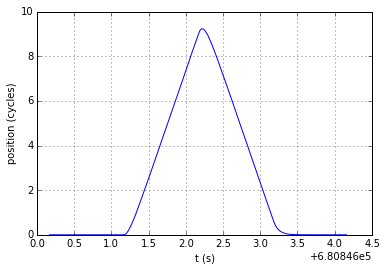

In [8]:
t = log[:,0]
position = log[:,1]
plt.plot(t, position)
plt.xlabel('t (s)')
plt.ylabel('position (cycles)')
plt.grid()

## Closed-loop on Position (Proportional Control)

In [10]:
reference = 2
controller.set_controller1(Proportional(9 / k, reference / 100))

In [13]:
controller.reset_logger()
with controller:
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(3)
    controller.set_reference1(50)
    time.sleep(3)
    controller.set_reference1(-50)
    time.sleep(3)
log = controller.get_log()

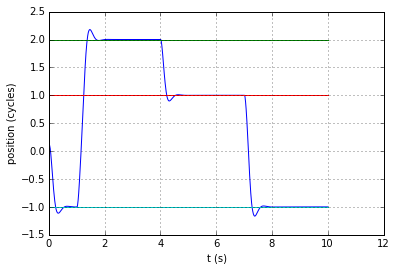

In [14]:
t = log[:,0]
position = log[:,1]
plt.plot(t, position, 
         (t[0],t[-1]), (reference, reference), 
         (t[0],t[-1]), (.5*reference, .5*reference),
         (t[0],t[-1]), (-.5*reference, -.5*reference))
plt.xlabel('t (s)')
plt.ylabel('position (cycles)')
plt.grid()

## Closed-loop on Velocity (Proportional Control)

In [15]:
reference = 10
print('reference = {0:4.2f}'.format(reference))
controller.set_controller1(VelocityController(Proportional(5 / k, reference / 100)))

reference = 10.00


In [16]:
controller.reset_logger()
with controller:
    controller.set_reference1(0)
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(3)
    controller.set_reference1(50)
    time.sleep(3)
    controller.set_reference1(-50)
    time.sleep(3)
log = controller.get_log()

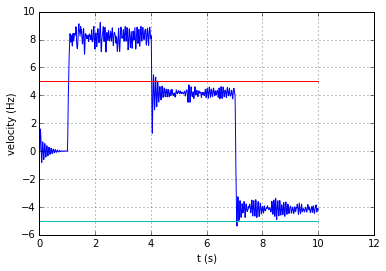

In [17]:
t = log[:,0]
velocity = np.zeros(t.shape, float)
velocity[1:] = (log[1:,1]-log[:-1,1])/controller.period
t = log[:,0]
plt.plot(t, velocity,
         (t[0],t[-1]), (reference, reference), 
         (t[0],t[-1]), (.5*reference, .5*reference),
         (t[0],t[-1]), (-.5*reference, -.5*reference))
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

### Closed-loop on Velocity (PI Control)

In [18]:
controller.set_controller1(VelocityController(PID(1 / k, a / k, 0, reference / 100)))

In [19]:
controller.reset_logger()
with controller:
    controller.set_reference1(0)
    time.sleep(1)
    controller.set_reference1(100)
    time.sleep(3)
    controller.set_reference1(50)
    time.sleep(3)
    controller.set_reference1(-50)
    time.sleep(3)
log = controller.get_log()

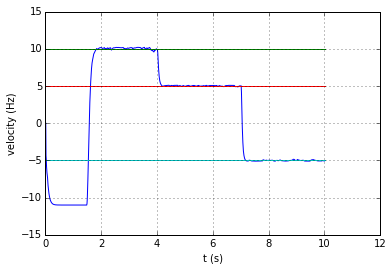

In [20]:
t = log[:,0]
velocity = np.zeros(t.shape, float)
velocity[1:] = (log[1:,1]-log[:-1,1])/controller.period
t = log[:,0]
plt.plot(t, velocity,
         (t[0],t[-1]), (reference, reference), 
         (t[0],t[-1]), (.5*reference, .5*reference),
         (t[0],t[-1]), (-.5*reference, -.5*reference))
plt.xlabel('t (s)')
plt.ylabel('velocity (Hz)')
plt.grid()

### Closed-loop on Velocity (PI Control) Asynchronous

In [19]:
controller.reset_logger()
controller.start()
controller.set_reference1(100)

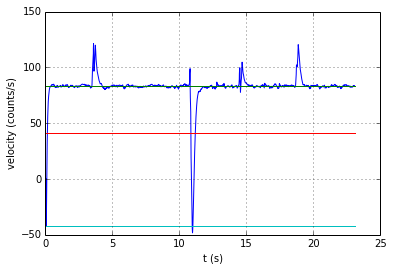

In [26]:
log = controller.get_log()
t = log[:,0]
velocity = np.zeros(t.shape, float)
velocity[1:] = (log[1:,1]-log[:-1,1])/controller.period
t = log[:,0]
plt.plot(t, velocity,
         (t[0],t[-1]), (reference, reference), 
         (t[0],t[-1]), (.5*reference, .5*reference),
         (t[0],t[-1]), (-.5*reference, -.5*reference))
plt.xlabel('t (s)')
plt.ylabel('velocity (counts/s)')
plt.grid()

In [24]:
controller.stop()